In [2]:
import pandas as pd
import numpy as np
import matplotlib as nlp
import re
import nltk

In [3]:
#read file
from google.colab import drive
drive.mount('/content/drive')
tweets  = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Influencer Tweets.csv")
#display the first tweets
tweets.head()

Mounted at /content/drive


,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source
0,FIFA World Cup,NaN,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 16:02:30+00:00,The greatest final ever. \n\n#FIFAWorldCup | #...,Twitter for Advertisers
1,beIN SPORTS,MENA,2012-05-10 13:45:16+00:00,1440770,5828,True,2023-01-18 15:39:50+00:00,🗓️🏆\n\nOne month on from a truly 𝙪𝙣𝙛𝙤𝙧𝙜𝙚𝙩𝙩𝙖𝙗𝙡𝙚...,Twitter Web App
2,FIFA World Cup,NaN,2010-04-29 10:58:07+00:00,12329448,2228,True,2023-01-18 11:30:30+00:00,"“Argentine Gold!” 🫶\n\nA month ago today, Ange...",Twitter for Advertisers
3,Road to 2022,NaN,2016-02-29 12:02:29+00:00,1296410,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: \n\n🥇 @Argentina \n🥈 @F...,Twitter for iPhone
4,Road to 2022,NaN,2016-02-29 12:02:29+00:00,1298433,877,True,2023-01-17 12:16:17+00:00,The #Qatar2022 Podium: \n\n🥇 @Argentina \n🥈 @F...,Twitter for iPhone


clearing duplicates

In [4]:
tweets.drop_duplicates(subset='text',inplace=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 987
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        987 non-null    object
 1   user_location    724 non-null    object
 2   user_created     987 non-null    object
 3   user_followers   987 non-null    int64 
 4   user_favourites  987 non-null    int64 
 5   user_verified    987 non-null    bool  
 6   date             987 non-null    object
 7   text             987 non-null    object
 8   source           987 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 70.4+ KB


deep cleaning

In [5]:
#replace all NaN values wit an empty string
tweets = tweets.replace(np.nan, '')
tweets.shape
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in tweets dataframe
tweets['text'] = tweets['text'].apply(lambda x:tweet_cleaner(x))
tweets.shape

(987, 9)

In [6]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (987, 9)


In [7]:
#downloading the vader lexicon from nltk
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [8]:
tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
603,GistReel.Com,,2012-10-20 00:43:50+00:00,352200,100,True,2022-12-10 19:02:26+00:00,Celebration after Morocco defeated Portugal at...,Twitter for Android,"{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compou..."
108,WhoScored.com,London,2009-12-27 23:22:45+00:00,899499,3721,True,2022-12-22 16:49:37+00:00,🔝 Top rated player at #Qatar2022: 🥇 Lionel Mes...,TweetDeck,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
498,The Daily Star,Bangladesh,2009-09-27 08:54:28+00:00,1452666,469,True,2022-12-13 03:35:26+00:00,#LionelMessi wasn't available at the pre-match...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
453,Khaleej Times,United Arab Emirates,2009-01-11 07:56:56+00:00,962809,30,True,2022-12-15 11:42:00+00:00,"#FifaWorldCup: #Mbappe, #Messi top contenders ...",Twitter Web App,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp..."
41,Road to 2022,,2016-02-29 12:02:29+00:00,1301906,876,True,2022-12-29 14:04:19+00:00,🎨 Explore the Museum of Islamic Art in all its...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."


In [9]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = tweets
tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
603,GistReel.Com,,2012-10-20 00:43:50+00:00,352200,100,True,2022-12-10 19:02:26+00:00,Celebration after Morocco defeated Portugal at...,Twitter for Android,"{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compou...",Negative
108,WhoScored.com,London,2009-12-27 23:22:45+00:00,899499,3721,True,2022-12-22 16:49:37+00:00,🔝 Top rated player at #Qatar2022: 🥇 Lionel Mes...,TweetDeck,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",Positive
498,The Daily Star,Bangladesh,2009-09-27 08:54:28+00:00,1452666,469,True,2022-12-13 03:35:26+00:00,#LionelMessi wasn't available at the pre-match...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
453,Khaleej Times,United Arab Emirates,2009-01-11 07:56:56+00:00,962809,30,True,2022-12-15 11:42:00+00:00,"#FifaWorldCup: #Mbappe, #Messi top contenders ...",Twitter Web App,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",Positive
41,Road to 2022,,2016-02-29 12:02:29+00:00,1301906,876,True,2022-12-29 14:04:19+00:00,🎨 Explore the Museum of Islamic Art in all its...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",Positive


In [10]:
tweets = tweets.replace(['Positive','Neutral','Negative'],[2, 1, 0])

In [11]:
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
603,GistReel.Com,,2012-10-20 00:43:50+00:00,352200,100,True,2022-12-10 19:02:26+00:00,Celebration after Morocco defeated Portugal at...,Twitter for Android,"{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compou...",0
108,WhoScored.com,London,2009-12-27 23:22:45+00:00,899499,3721,True,2022-12-22 16:49:37+00:00,🔝 Top rated player at #Qatar2022: 🥇 Lionel Mes...,TweetDeck,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",2
498,The Daily Star,Bangladesh,2009-09-27 08:54:28+00:00,1452666,469,True,2022-12-13 03:35:26+00:00,#LionelMessi wasn't available at the pre-match...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
453,Khaleej Times,United Arab Emirates,2009-01-11 07:56:56+00:00,962809,30,True,2022-12-15 11:42:00+00:00,"#FifaWorldCup: #Mbappe, #Messi top contenders ...",Twitter Web App,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",2
41,Road to 2022,,2016-02-29 12:02:29+00:00,1301906,876,True,2022-12-29 14:04:19+00:00,🎨 Explore the Museum of Islamic Art in all its...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",2


In [12]:
tweets.drop(['user_name','user_location','user_created','user_followers','user_favourites','user_verified','date','source','scores'], axis=1, inplace=True)

In [13]:
tweets['text'] = tweets['text'].astype('str')


Check the number of positive vs. negative tagged sentences

In [14]:
positives = tweets['sentiment'][tweets.sentiment == 2 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         987
No. of positve tagged sentences is:  472
No. of negative tagged sentences is: 137


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#removing shortwords
tweets['text']=tweets['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,text,sentiment
603,Celebration after Morocco defeated Portugal Qu...,0
108,rated player #Qatar2022: Lionel Messi 8.25 rat...,2
498,#LionelMessi wasn't available pre-match press ...,1
453,"#FifaWorldCup: #Mbappe, #Messi contenders #Gol...",2
41,Explore Museum Islamic beauty #Qatar2022,2


In [17]:
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [18]:
tokenized_tweet=tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [Qatar, Worldcup, 2022, Round, Match, results,...
1    [Fernando, Santos, been, sacked, head, coach, ...
2    [This, been, 𝗲𝘃𝗲𝗿𝘆𝘄𝗵𝗲𝗿𝗲, What, tournament, Ant...
3    [WATCH:, #BNNQatar, Reports, Let's, take, look...
4    ["What, looking, fool?, lost!", #LionelMessi's...
Name: text, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['text'].values.astype('U'))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Train/Test Split¶


In [20]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


Naive Bayes

In [21]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.55050505 0.55050505 0.59390863 0.61928934 0.6142132 ]
Train accuracy =95.31%
Test accuracy =57.58%


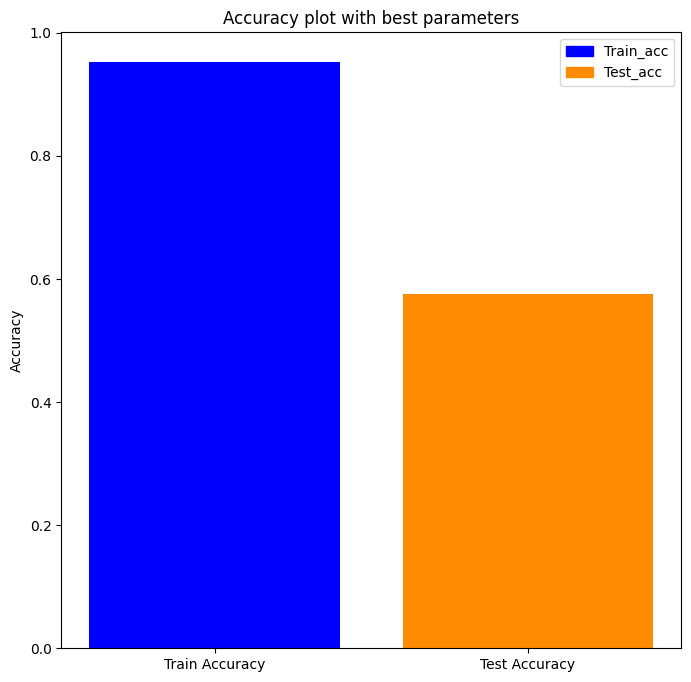

In [22]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()


Confusion Matrix

In [23]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[14 10  9]
 [ 8 38 17]
 [14 26 62]]


In [24]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.39      0.42      0.41        33
           1       0.51      0.60      0.55        63
           2       0.70      0.61      0.65       102

    accuracy                           0.58       198
   macro avg       0.54      0.55      0.54       198
weighted avg       0.59      0.58      0.58       198




Calculating F1, prescision and recall scores

In [25]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =53.77%
Precision score =53.56%
Recall score =54.51%


In [26]:
tweets = tweets.replace([2,1,0],['Positive', 'Neutral','Negative'])
tweets.head()

,text,sentiment
0,Qatar Worldcup 2022 Round Match results today ...,Neutral
1,Fernando Santos been sacked head coach Portuga...,Neutral
2,This been 𝗲𝘃𝗲𝗿𝘆𝘄𝗵𝗲𝗿𝗲 What tournament Antoine G...,Neutral
3,WATCH: #BNNQatar Reports Let's take look Lione...,Positive
4,"""What looking fool? lost!"" #LionelMessi's #Qat...",Positive


In [27]:
temp = tweets.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,Positive,472
1,Neutral,378
0,Negative,137
